# Percursos em Grafos
## Algoritmo de Warshall
*Universidade Federal de Lavras  
Departamento de Ciência da Computação  
GCC218 - Algoritmos em Grafos  
Professor: Mayron Moreira*

## Alcançabilidade em grafos direcionados

> **STEPHEN WARSHALL (1935–2006)** Stephen Warshall, born in New York City, went to public school in Brooklyn. He attended Harvard University, receiving his degree in mathematics in 1956. He never received an advanced degree, because at that time no programs were available in his areas of interest. However, he took graduate courses at several different universities and contributed to the development of computer science and software engineering. After graduating from Harvard, Warshall worked at ORO (Operation Research Office), which was set up by Johns Hopkins to do research and development for the U.S. Army. In 1958 he left ORO to take a position at a company called Technical Operations, where he helped build a research and development laboratory for military software projects. In 1961 he left Technical Operations to found Massachusetts Computer Associates. Later, this company became part of Applied Data Research (ADR). After the merger, Warshall sat on the board of directors of ADR and managed a variety of projects and organizations. He retired from ADR in 1982. During his career Warshall carried out research and development in operating systems, compiler design, language design, and operations research. In the 1971–1972 academic year he presented lectures on software engineering at French universities. There is an interesting anecdote about his proof that the transitive closure algorithm, now known as Warshall’s algorithm, is correct. He and a colleague at Technical Operations bet a bottle of rum on who first could determine whether this algorithm always works. Warshall came up with his proof overnight, winning the bet and the rum, which he shared with the loser of the bet. Because Warshall did not like sitting at a desk, he did much of his creative work in unconventional places, such as on a sailboat in the Indian Ocean or in a Greek lemon orchard. 
> - Rosen, K. H., & Krithivasan, K. (2012). Discrete mathematics and its applications: with combinatorics and graph theory. Tata McGraw-Hill Education. (Página 604)  

Imaginemos a seguinte situação: dada uma matriz curricular de um curso de graduação, desejamos determinar qual disciplina é o *gargalo* do curso. Tal disciplina consiste na matéria com maior número de pré-requisitos diretos e indiretos. Como determinar essa informação, de maneira eficiente? Vejamos, inicialmente, como modelar um grafo de grade curricular.

* Por simplicidade, vamos eliminar a relação de co-requisito entre disciplinas, visto que não ocorrem de maneira frequente;  
* Definimos como vértices o conjunto de disciplinas;  
* O arco $(u,v)$ indica que a disciplina $u$ deve ser feita antes da disciplina $v$.  

Abaixo, seguem os grafos das matrizes curriculares de Bacharelado em Sistemas de Informação (2015/02) e Bacharelado em Ciência da Computação (2016/01).

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

'''
A função retorna:
- Matriz de adjacencia do grafo;
- Dicionario de disciplinas e seus identificadores.
'''
def leArquivo(nome_arquivo):
    # Usado apenas para o desenho do grafo
    G = nx.DiGraph()
    linhas = [linha.rstrip().split() for linha in open(nome_arquivo)]

    # Numero de vertices do grafo
    n = int(linhas[0][0])
    
    # Dicionario de disciplinas
    disc = {}
    
    # Matriz de adjacencia
    M = [[0 for j in range(n)] for i in range(n)]

    # Vertice atual
    vtx = 0

    for l in range(1,len(linhas)):
        x = linhas[l][0]
        if(disc.get(x) == None):
            disc[x] = vtx
            G.add_node(x)
            vtx = vtx + 1
            
        if(len(linhas[l]) == 2):
            y = linhas[l][1]
            if(disc.get(y) == None):
                disc[y] = vtx
                G.add_node(y)
                vtx = vtx + 1
                
            G.add_edge(x, y)
            #print(x, " ", disc[x], " ", y, " ", disc[y])
            M[disc[x]][disc[y]] = 1
    
    pos = nx.random_layout(G,dim=2)
    nx.draw(G, with_labels=True, pos=pos, font_weight='bold')
    plt.show()
            
    return (M, disc)

### Obtendo as informações dos arquivos

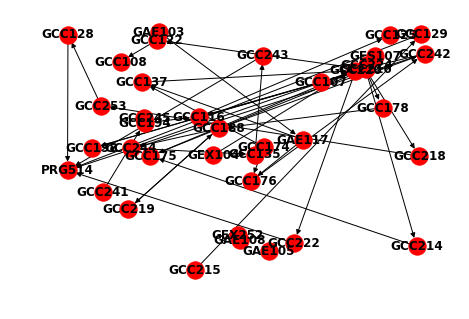

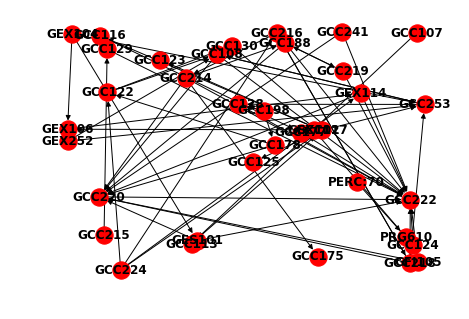

In [2]:
(M_bsi, disc_bsi) = leArquivo('4-Grafo_BSI.txt')
(M_bcc, disc_bcc) = leArquivo('4-Grafo_BCC.txt')

### Definição do problema

* **Problema da Disciplina *Gargalo***
    * **Instância**: um grafo direcionado, em que os vértices são as disciplinas, e os arcos representam relações de pré-requisito entre a disciplina $u$ e a disciplina $v$ ($(u,v)$ indica que $u$ é pré-requisito de $v$).  
    * **Saída**: a disciplina com o maior número de disciplinas que dependem dela, de forma direta ou indireta.

### Como resolver

Vamos utilizar o Algoritmo de Warshall, pois em suma, devemos encontrar o **fecho transitivo** do grafo direcionado. Para tanto, seja $W \in \mathbb{B}^{n \times n}$ uma matriz binária quadrada de dimensão $n$, em que $n$ é o número de vértices do grafo direcionado. A matriz $W[u][v]$ é um se o vértice $v$ é alcançável a partir de $u$.  

- A alcançabilidade direta entre os vértices é obtida a partir da matriz de adjacência do grafo.  
- Para calcularmos a alcançabilidade indireta, vamos considerar a presença de vértices de "atalho", que usaremos para alcançar os outros.  
- Suponha $\{1,...,k\}$ como um conjunto de vértices candidatos a serem intermediários no percurso de $u$ a $v$, $k \le n$.  
- Se $W[u][v]$ é igual a 1, não temos o que fazer. Caso o contrário, suponha um vértice intermediário $k$. Então, se $W[u][k] = 1$ e $W[k][v] = 1$, logo $W[u][v] = 1$.  
- Mas quais valores de $k$ podemos testar? Todos, de forma iterativa! O importante é notar que se descobrimos que com $n=10$ e $k=3$, conseguimos alcançar $2$ a partir de $1$, utilizamos essa informação para os próximos passos do algoritmo, configurando que $W[1][2] = 1$, mesmo que não haja ligação direta no grafo inicial.  

#### Algoritmo

In [3]:
import copy as cp

# Inputs: Matriz de adjacência e dimensão da matriz
def Warshall(M, n):
    # Matriz de resposta
    W = cp.deepcopy(M) # Custo de O(n^2)
    
    for k in range(n): # Para cada vertice intermediario
        for u in range(n): # Vertice origem
            for v in range(n): # Vertice destino
                W[u][v] = W[u][v] or (W[u][k] and W[k][v])
    
    return W

A complexidade de *Warshall* é $O(n^3)$, devido aos três laços aninhados.  

Calculada a matriz de Warshall, a disciplina gargalo consiste na linha da matriz $W$ com a maior quantidade de 1's.

In [4]:
# Retorna o total de seguidores, e o indice da disciplina gargalo
def discGargalo(W, n):
    idx_disciplina = 0 # Indice da disciplina em questao
    aux = sum(W[0])
    for i in range(1, n):
        if(aux < sum(W[i])):
            aux = sum(W[i])
            idx_disciplina = i
            
    return (aux, idx_disciplina)

#### Testando

In [5]:
W_bsi = Warshall(M_bsi, len(disc_bsi))
W_bcc = Warshall(M_bcc, len(disc_bcc))

(bsi_val, idx_bsi) = discGargalo(W_bsi, len(disc_bsi))
(bcc_val, idx_bcc) = discGargalo(W_bcc, len(disc_bcc))

for key in disc_bsi.keys():
    if(disc_bsi[key] == idx_bsi):
        print("Disciplina gargalo BSI: ", key, " (", bsi_val, ")")

for key in disc_bcc.keys():
    if(disc_bcc[key] == idx_bcc):
        print("Disciplina gargalo BCC: ", key, " (", bcc_val, ")")

Disciplina gargalo BSI:  GCC224  ( 21 )
Disciplina gargalo BCC:  GCC224  ( 22 )


#### Uma dúvida

Se tomássemos os três laços aninhados de *Warshall* da seguinte forma:

In [6]:
# Inputs: Matriz de adjacência e dimensão da matriz
def Warshall_Modif(M, n):
    # Matriz de resposta
    W = cp.deepcopy(M) # Custo de O(n^2)
    
    for u in range(n): # Para cada vertice intermediario
        for v in range(n): # Vertice origem
            for k in range(n): # Vertice destino
                W[u][v] = W[u][v] or (W[u][k] and W[k][v])
    
    return W

O algoritmo produziria resultados corretos? A resposta é **não**. Veja o exemplo abaixo.

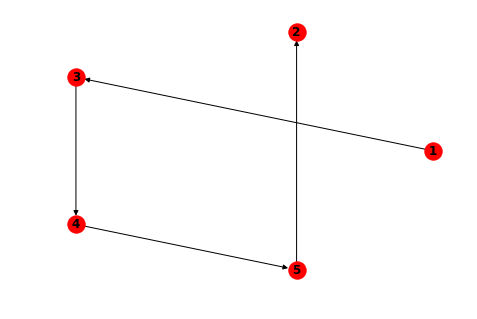

[[0, 0, 1, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1], [0, 1, 0, 0, 0]]


In [9]:
# Arcos
E = [(1,3), (3,4), (4,5), (5,2)]
G = nx.DiGraph()

for i in range(1,6):
    G.add_node(i)
    
for e in E:
    G.add_edge(e[0], e[1])
    
pos = nx.circular_layout(G,dim=2)
nx.draw(G, with_labels=True, pos=pos, font_weight='bold')
plt.show()

M = [[0 for j in range(5)] for i in range(5)]
for e in E:
    M[e[0]-1][e[1]-1] = 1
print(M)

Comparemos as duas chamadas de *Warshall* e *Warshall_Modif*.

In [10]:
W1 = Warshall(M, 5)
W2 = Warshall_Modif(M, 5)

print("W1 = ", W1)
print("W2 = ", W2)

W1 =  [[0, 1, 1, 1, 1], [0, 0, 0, 0, 0], [0, 1, 0, 1, 1], [0, 1, 0, 0, 1], [0, 1, 0, 0, 0]]
W2 =  [[0, 0, 1, 1, 1], [0, 0, 0, 0, 0], [0, 0, 0, 1, 1], [0, 1, 0, 0, 1], [0, 1, 0, 0, 0]]


Note que quando calculamos $W[1][2]$, ainda não sabemos que existe um caminho de $3$ para $2$. Logo, os resultados serão inconsistentes.

A técnica de programação utilizada pelo Algoritmo de Warshall é denominada **Programação Dinâmica**, que se beneficia da subestrutura ótima do problema para resolvê-lo de forma *bottom-up*. Tal técnica será vista com mais detalhes no curso de *Complexidade e Projeto de Algoritmos*.